#1) Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1= pd.read_csv('/content/Fraud_check.csv')

In [ ]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
data1.shape

(600, 6)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data1['Undergrad']=le.fit_transform(data1['Undergrad'])

In [ ]:
data1['Urban']=le.fit_transform(data1['Urban'])
data1['Marital.Status']=le.fit_transform(data1['Marital.Status'])

In [ ]:
data1.rename(columns={'Marital.Status':'Marital','Taxable.Income':'TaxableI_C','City.Population':'Population',' Work.Experience':'Experience'},inplace=True)
data1

,Undergrad,Marital,TaxableI_C,Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital          600 non-null    int64
 2   TaxableI_C       600 non-null    int64
 3   Population       600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [ ]:
data1.describe()

,Undergrad,Marital,TaxableI_C,Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


In [ ]:
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [ ]:
data1[data1.duplicated()]

,Undergrad,Marital,TaxableI_C,Population,Work.Experience,Urban


In [ ]:
data1.isnull()

,Undergrad,Marital,TaxableI_C,Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [ ]:
data1.isnull().sum()

Undergrad          0
Marital            0
TaxableI_C         0
Population         0
Work.Experience    0
Urban              0
dtype: int64

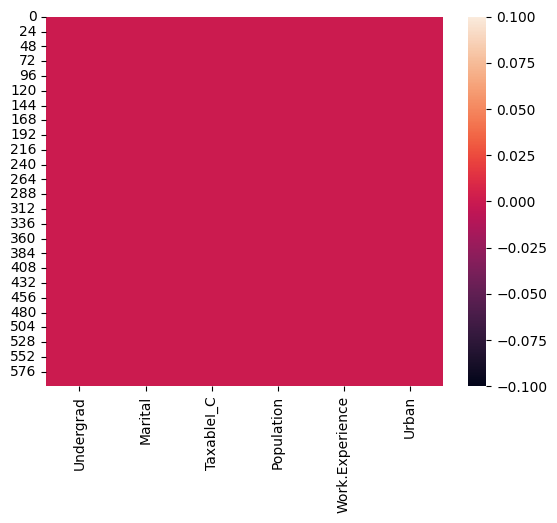

In [ ]:
sns.heatmap(data1.isnull())
plt.show()

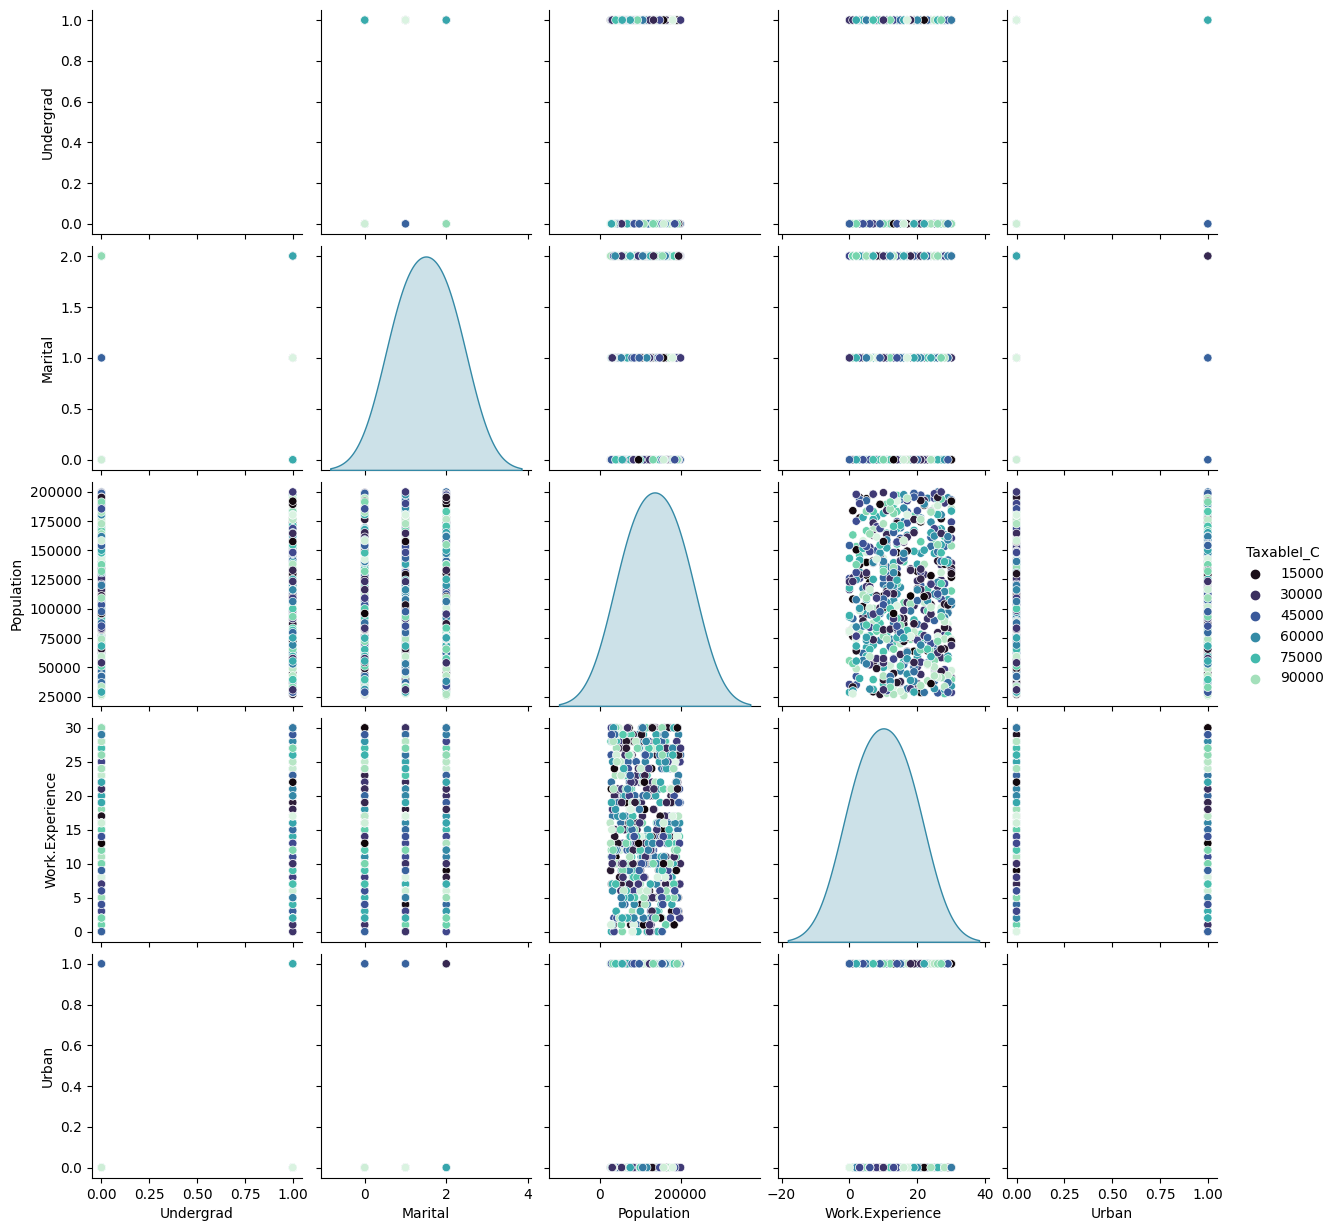

In [ ]:
sns.pairplot(data1,palette='mako',hue='TaxableI_C')
plt.show()

In [ ]:
data1.corr()

,Undergrad,Marital,TaxableI_C,Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
TaxableI_C,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


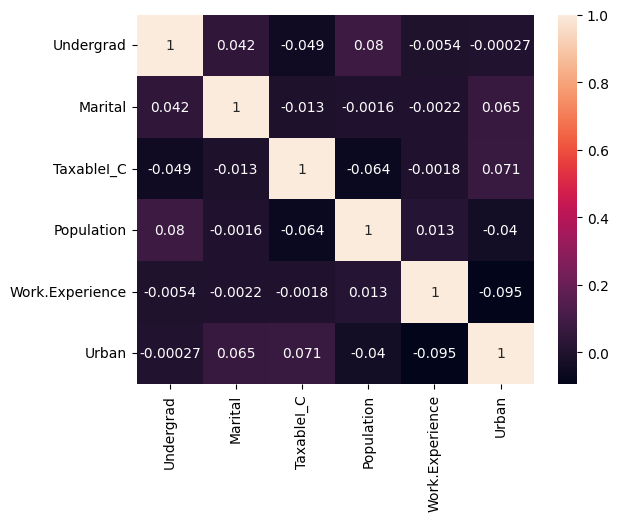

In [ ]:
sns.heatmap(data1.corr(),annot=True)
plt.show()

In [ ]:
data1.describe()

,Undergrad,Marital,TaxableI_C,Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


Let's check the outliers

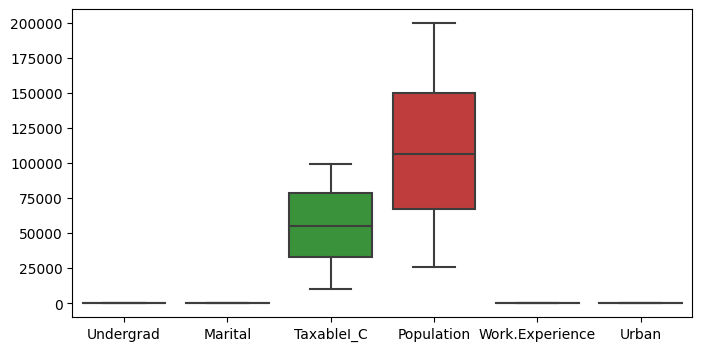

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data1)
plt.show()

In [ ]:
data1['taxabkeI_C']=data1['TaxableI_C']

In [ ]:
data1.drop('TaxableI_C',axis=1,inplace=True)
data1

,Undergrad,Marital,Population,Work.Experience,Urban,taxabkeI_C
0,0,2,50047,10,1,68833
1,1,0,134075,18,1,33700
2,0,1,160205,30,1,36925
3,1,2,193264,15,1,50190
4,0,1,27533,28,0,81002
...,...,...,...,...,...,...
595,1,0,39492,7,1,76340
596,1,0,55369,2,1,69967
597,0,0,154058,0,1,47334
598,1,1,180083,17,0,98592


In [ ]:
status=[]
for income in data1['taxabkeI_C']:
  if income<=30000:
    status.append('Risky')
  else :
    status.append('Good')

In [ ]:
data1['Status']=status

In [ ]:
data1

,Undergrad,Marital,Population,Work.Experience,Urban,taxabkeI_C,Status
0,0,2,50047,10,1,68833,Good
1,1,0,134075,18,1,33700,Good
2,0,1,160205,30,1,36925,Good
3,1,2,193264,15,1,50190,Good
4,0,1,27533,28,0,81002,Good
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,Good
596,1,0,55369,2,1,69967,Good
597,0,0,154058,0,1,47334,Good
598,1,1,180083,17,0,98592,Good


In [ ]:
data1['Status']=le.fit_transform(data1['Status'])
data1

,Undergrad,Marital,Population,Work.Experience,Urban,taxabkeI_C,Status
0,0,2,50047,10,1,68833,0
1,1,0,134075,18,1,33700,0
2,0,1,160205,30,1,36925,0
3,1,2,193264,15,1,50190,0
4,0,1,27533,28,0,81002,0
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,0
596,1,0,55369,2,1,69967,0
597,0,0,154058,0,1,47334,0
598,1,1,180083,17,0,98592,0


In [ ]:
data1.drop('taxabkeI_C',axis=1,inplace=True)

In [ ]:
data1

,Undergrad,Marital,Population,Work.Experience,Urban,Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [ ]:
X=data1.iloc[:,:5]
y=data1.iloc[:,5]

Data Blancing using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn import over_sampling
smote=SMOTE(sampling_strategy='auto')

In [ ]:
X_resampled,y_resampled=smote.fit_resample(X,y)

In [ ]:
smote_data1=pd.DataFrame(data=X_resampled,columns=X.columns)

In [ ]:
smote_data1['status']=y_resampled

In [ ]:
smote_data1

,Undergrad,Marital,Population,Work.Experience,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
947,0,0,36298,22,0,1
948,0,0,36362,18,0,1
949,0,1,60134,19,1,1
950,0,1,82020,20,1,1


Data Segregation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100,max_features=4,max_leaf_nodes=10,max_depth=8,random_state=42)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=4, max_leaf_nodes=10,
                       random_state=42)

Tree plotting

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
fnames=smote_data1.columns
fnames=fnames.tolist()
fnames

['Undergrad', 'Marital', 'Population', 'Work.Experience', 'Urban', 'status']

In [ ]:
cname=smote_data1['status'].unique()
cname=[str(class_name) for class_name in cname]

In [ ]:
tree_to_visualize=rf_model.estimators_[0]

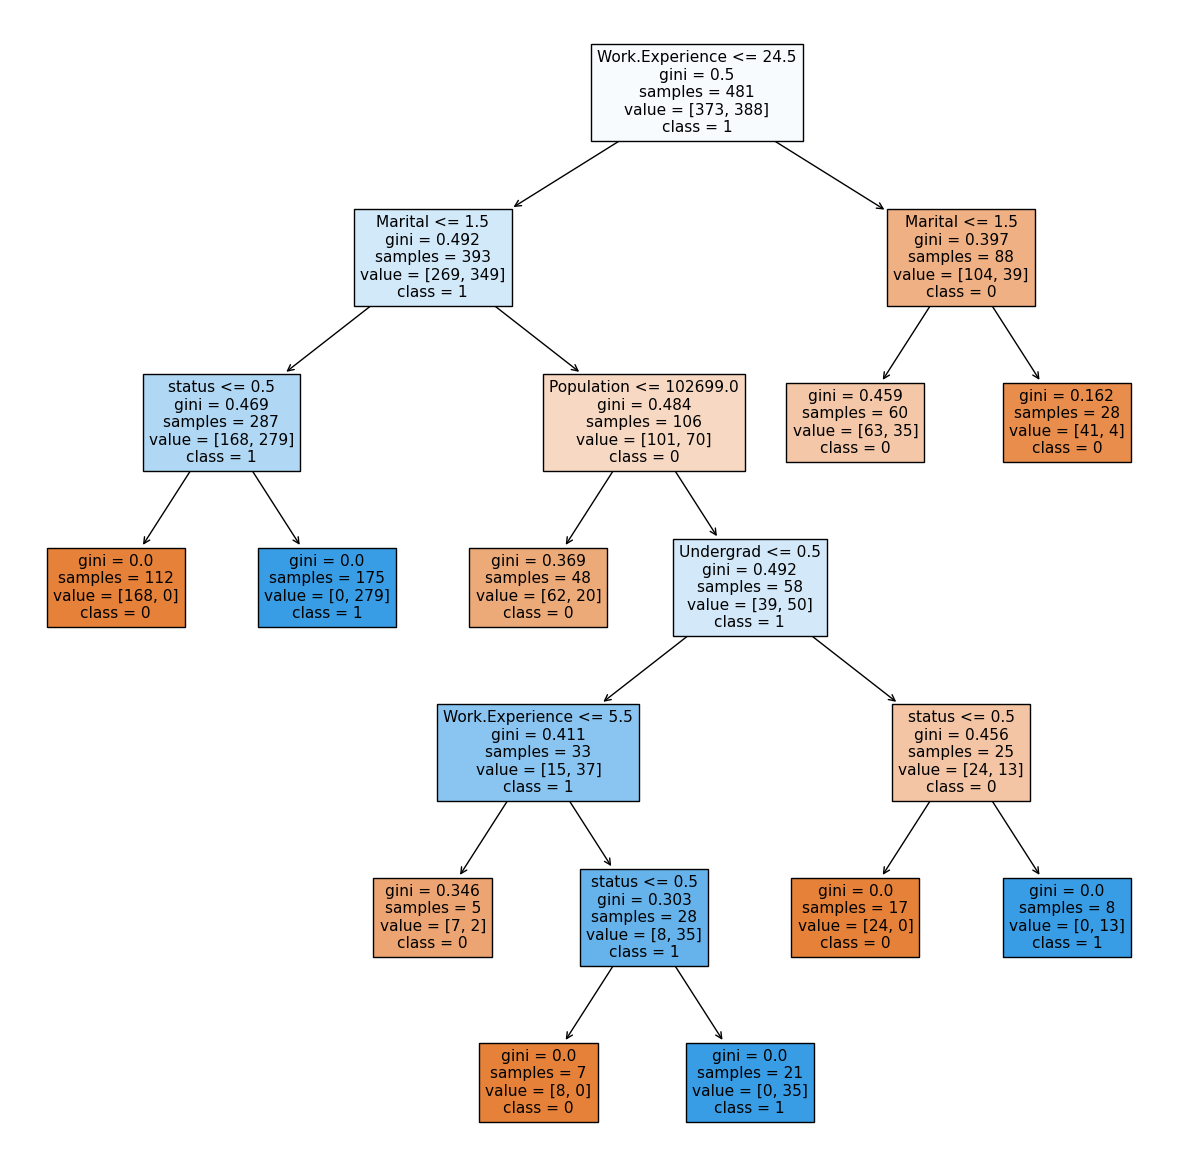

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(tree_to_visualize,feature_names=fnames,class_names=cname,filled=True)
plt.show()

Conffusion Matrix, Classification Report, ROC-curve and ROC-AUC score

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [ ]:
train_pred=rf_model.predict(X_train)

In [ ]:
test_pred=rf_model.predict(X_test)

In [ ]:
confusion_matrix(y_train,train_pred)

array([[381,   0],
       [  0, 380]])

In [ ]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       380

    accuracy                           1.00       761
   macro avg       1.00      1.00      1.00       761
weighted avg       1.00      1.00      1.00       761



In [ ]:
confusion_matrix(y_test,test_pred)

array([[95,  0],
       [ 0, 96]])

In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        96

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



In [ ]:
train_proba=rf_model.predict_proba(X_train)

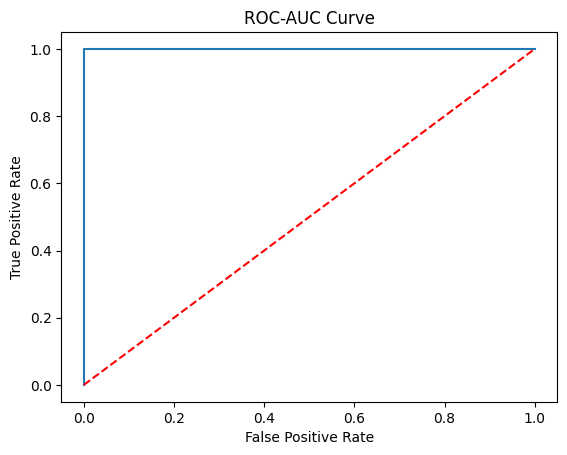

In [ ]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
roc_auc_score(y_train,train_pred)

1.0

In [ ]:
test_pred=rf_model.predict_proba(X_test)

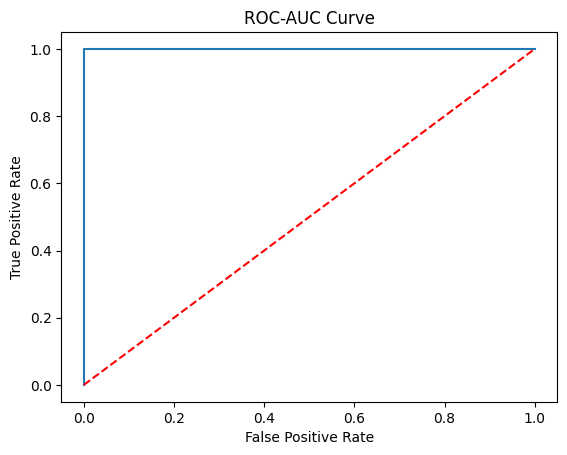

In [ ]:
fpr,tpr,thresh=roc_curve(y_test,test_pred[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
y_score=test_pred[:,1]

In [ ]:
roc_auc=roc_auc_score(y_test,y_score)

In [ ]:
roc_auc

1.0

Data visulazation

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
vmodel=TSNE(n_components=2)
tcomps=vmodel.fit_transform(X_resampled)

In [ ]:
tcomps

array([[-40.288223 ,  -8.519953 ],
       [ 13.8230505,  24.648136 ],
       [ 29.43922  , -14.027025 ],
       ...,
       [-31.368864 , -11.1923   ],
       [-12.23453  ,  20.208876 ],
       [ -3.2425406, -12.643079 ]], dtype=float32)

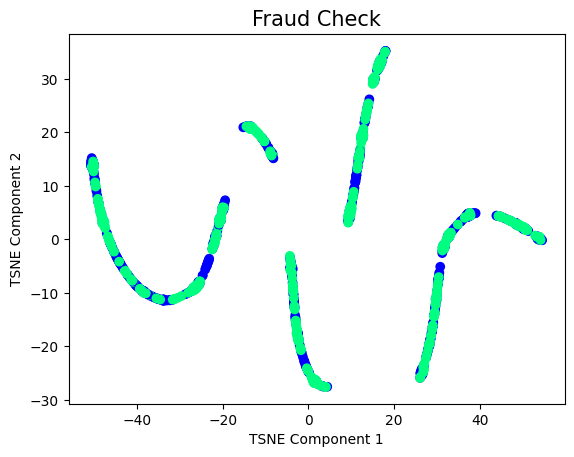

In [ ]:
plt.title('Fraud Check',fontsize=15)
plt.scatter(tcomps[:,0],tcomps[:,1],c=y_resampled,cmap='winter')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

In [ ]:
smote_data1

,Undergrad,Marital,Population,Work.Experience,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
947,0,0,36298,22,0,1
948,0,0,36362,18,0,1
949,0,1,60134,19,1,1
950,0,1,82020,20,1,1


#2)  Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [ ]:
data=pd.read_csv('/content/Company_Data.csv')

In [ ]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
data.shape

(400, 11)

In [ ]:
data['sales']=data['Sales']

In [ ]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ales,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50,9.50
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,11.22,11.22
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06,10.06
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40,7.40
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,4.15,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,12.57,12.57
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,6.14,6.14
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,7.41,7.41
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,5.94,5.94


In [ ]:
data.drop('Sales',axis=1,inplace=True)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ales,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22,11.22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06,10.06
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40,7.40
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,12.57,12.57
396,139,23,3,37,120,Medium,55,11,No,Yes,6.14,6.14
397,162,26,12,368,159,Medium,40,18,Yes,Yes,7.41,7.41
398,100,79,7,284,95,Bad,50,12,Yes,Yes,5.94,5.94


In [ ]:
data.drop('ales',axis=1,inplace=True)

In [ ]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,12.57
396,139,23,3,37,120,Medium,55,11,No,Yes,6.14
397,162,26,12,368,159,Medium,40,18,Yes,Yes,7.41
398,100,79,7,284,95,Bad,50,12,Yes,Yes,5.94


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])

In [ ]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,9.50
1,111,48,16,260,83,1,65,10,1,1,11.22
2,113,35,10,269,80,2,59,12,1,1,10.06
3,117,100,4,466,97,2,55,14,1,1,7.40
4,141,64,3,340,128,0,38,13,1,0,4.15
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,12.57
396,139,23,3,37,120,2,55,11,0,1,6.14
397,162,26,12,368,159,2,40,18,1,1,7.41
398,100,79,7,284,95,0,50,12,1,1,5.94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompPrice    400 non-null    int64  
 1   Income       400 non-null    int64  
 2   Advertising  400 non-null    int64  
 3   Population   400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    int64  
 9   US           400 non-null    int64  
 10  sales        400 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
data[data.duplicated()]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales


In [ ]:
data.isnull()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

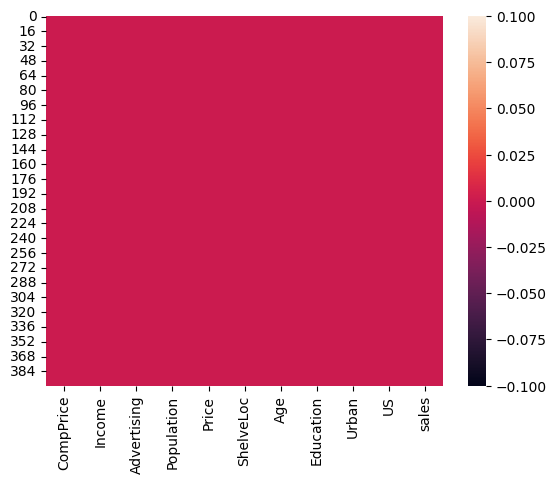

In [ ]:
sns.heatmap(data.isnull())
plt.show()

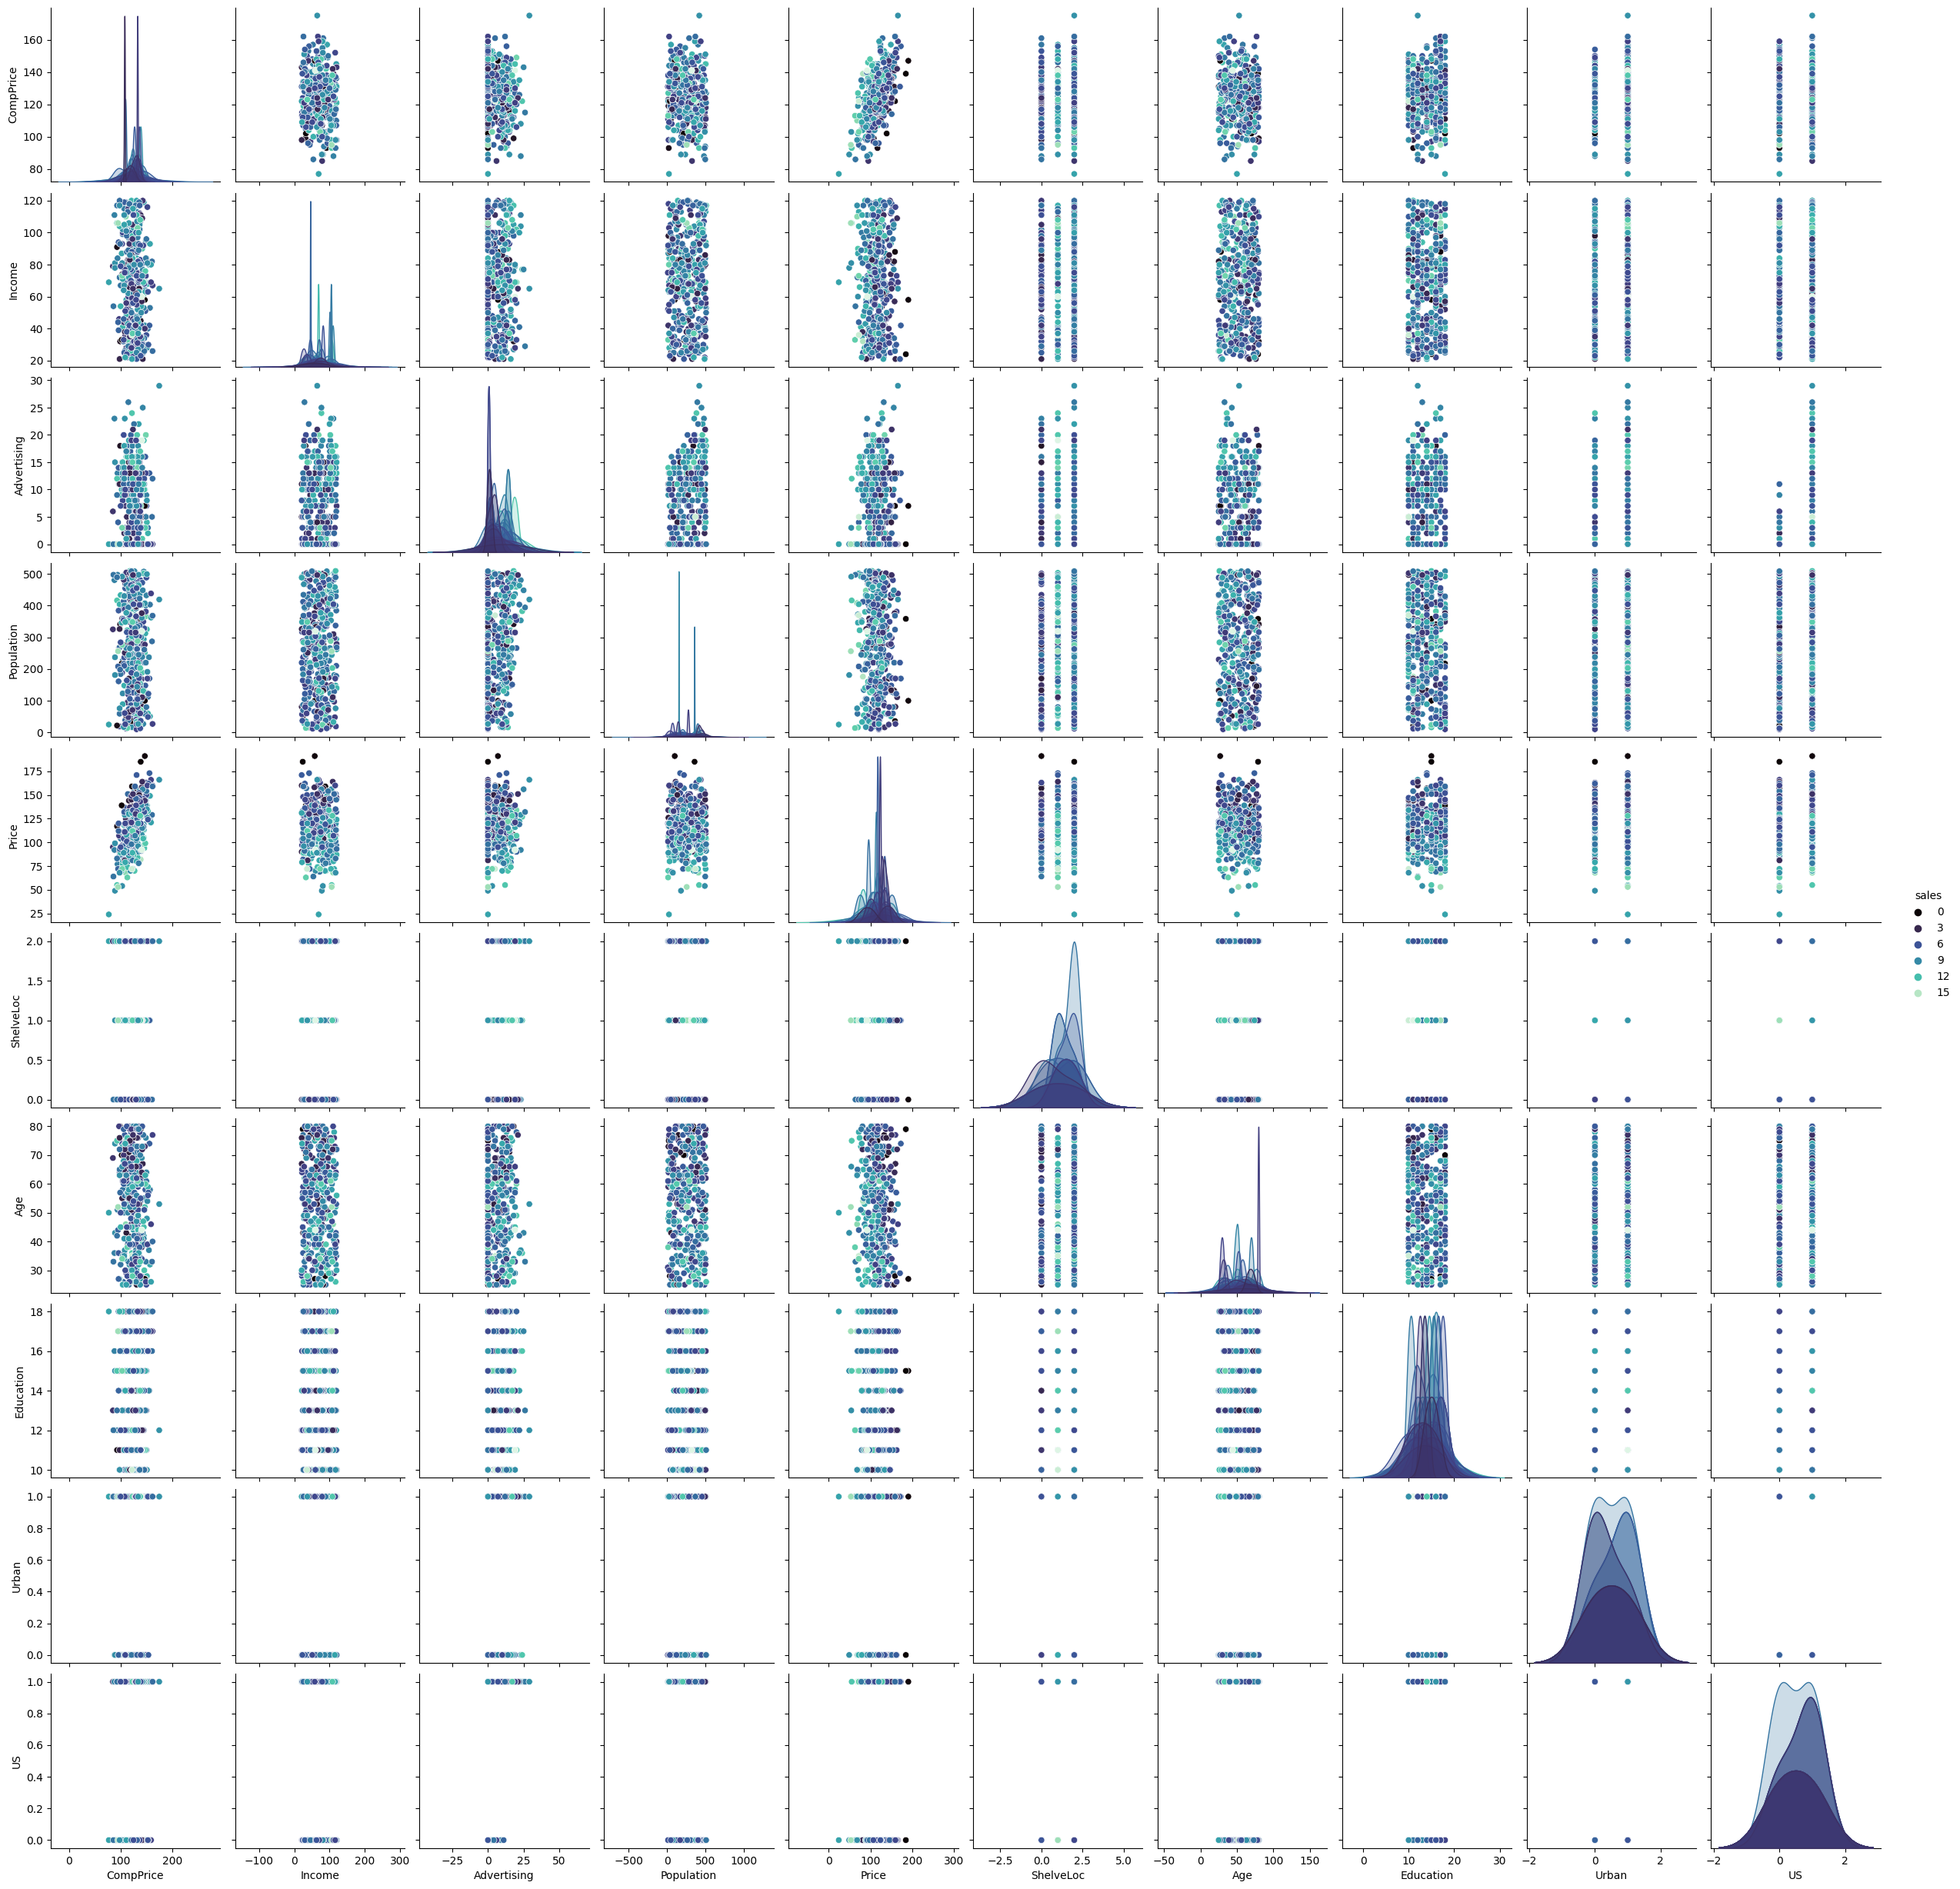

In [ ]:
sns.pairplot(data,palette='mako',hue='sales')
plt.show()

In [ ]:
data.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.064079
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.151951
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.269507
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.050471
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.444951
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.157470
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.231815
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.051955
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.015419
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,0.177093


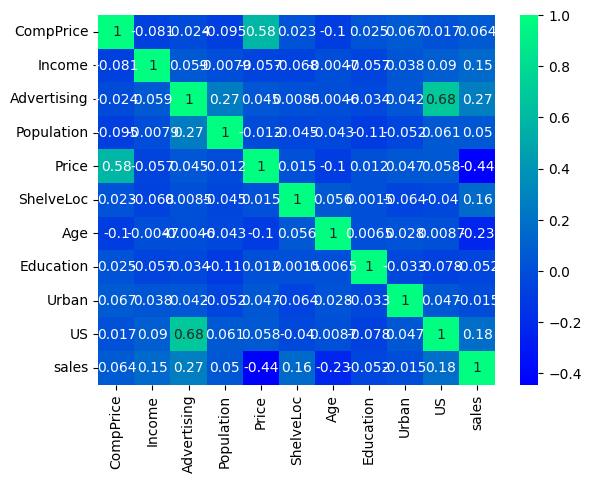

In [ ]:
sns.heatmap(data.corr(),cmap='winter',annot=True)
plt.show()

In [ ]:
data.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,7.496325
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,2.824115
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,5.390000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,7.490000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,9.320000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,16.270000


Checking Outliers

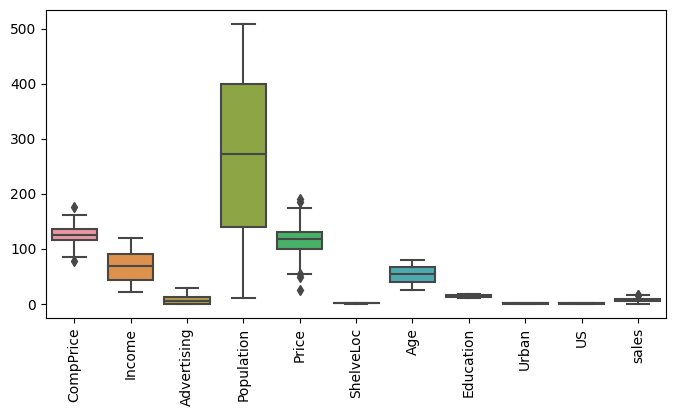

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

Data Segregation

In [ ]:
X=data.iloc[:,0:10]
y=data.iloc[:,10]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,

((320, 10), (80, 10), (320,), (80,))

Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model1=RandomForestRegressor(n_estimators=50,max_features=5,max_depth=8,max_leaf_nodes=10,random_state=42)

In [ ]:
rf_model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=5, max_leaf_nodes=10,
                      n_estimators=50, random_state=42)

In [ ]:
train_pred=rf_model1.predict(X_train)

In [ ]:
test_pred=rf_model1.predict(X_test)

Check the parameter

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)

In [ ]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [ ]:
train_rmse,  test_rmse

(1.6015118210685728, 2.206228363661943)

Ploting Tree

In [ ]:
tree_to_visualize1=rf_model1.estimators_[0]

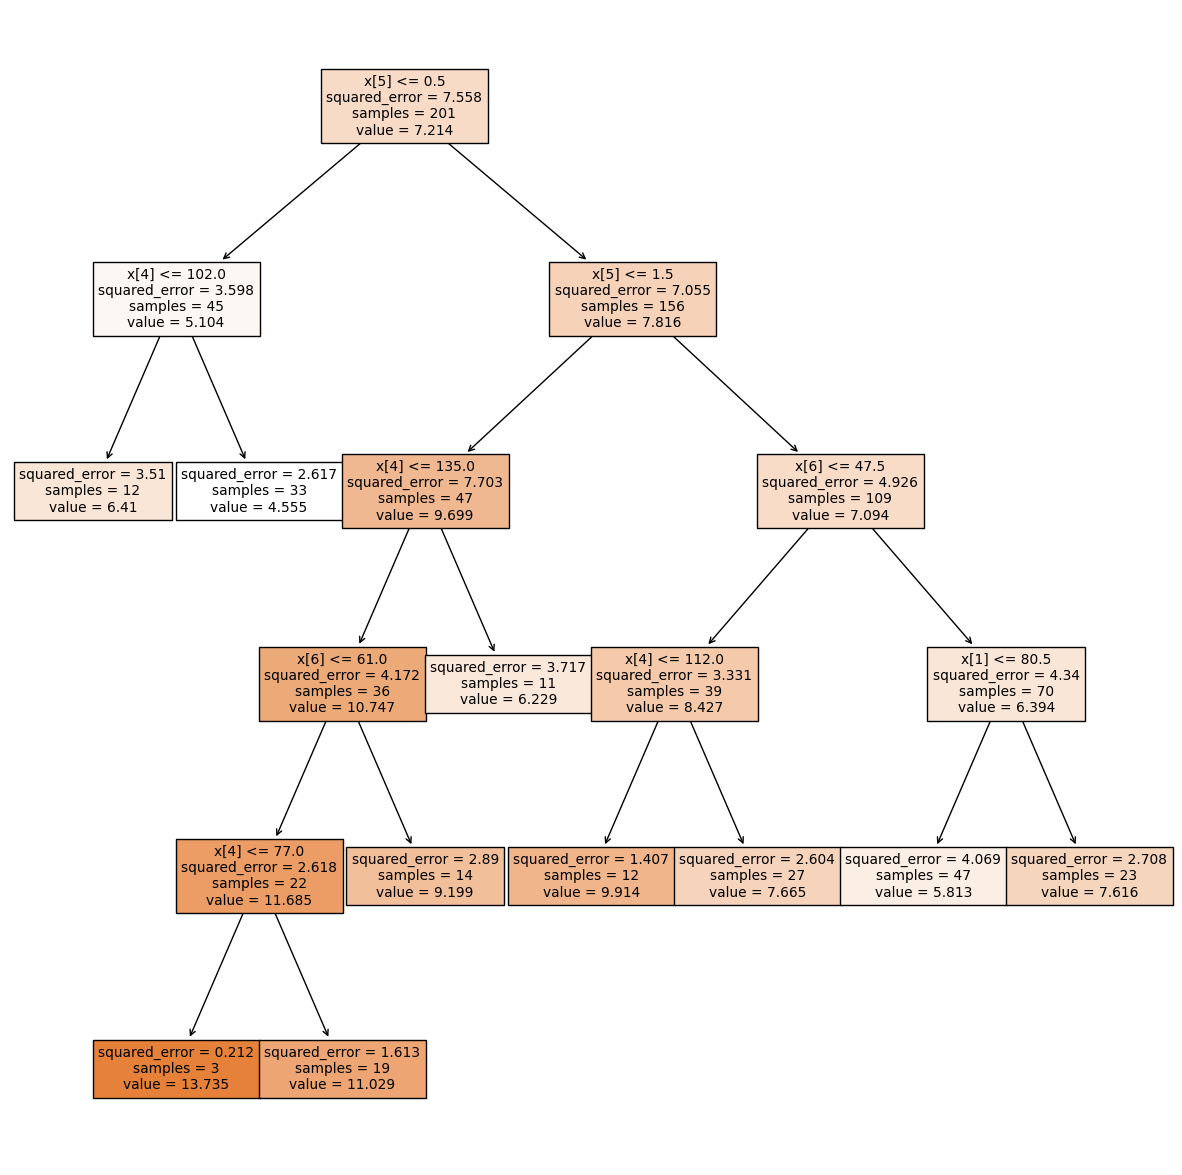

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(tree_to_visualize1,filled=True)
plt.show()

In [ ]:
modelv1=TSNE(n_components=2)

In [ ]:
tsne_comps=modelv1.fit_transform(X)

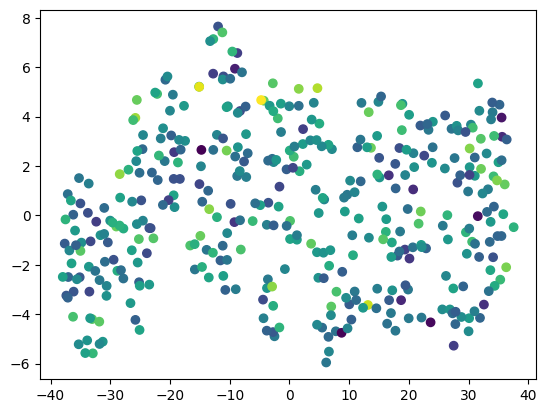

In [ ]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis')
plt.show()

Test with new data

In [ ]:
test_data=pd.DataFrame({'CompPrice':115,	'Income':50,	'Advertising':5,	'Population':300,	'Price':110,	'ShelveLoc':3,	'Age':60, 'Education':16,	'Urban':1,	'US':1},index=[1])

In [ ]:
test_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,115,50,5,300,110,3,60,16,1,1


In [ ]:
rf_model1.predict(test_data)

array([6.93412708])